In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.3.4     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
activity = read.csv("../_data/carp_activity.csv", header=TRUE, stringsAsFactors=FALSE)
head(activity, 3)

Date,Carpentry,Helper,Instructor,Organizer.Instructor,Organizer,URL
2014-05-08,Data,1,0,0,0,NESCENT
2014-09-29,Data,0,1,0,0,http://www.datacarpentry.org/2014-09-29-iDigBio/
2015-04-02,Software,0,1,0,0,https://xuf12.github.io/2015-04-02-umiami/


In [3]:
#activity$helper_cs = cumsum(activity$helper)
#activity$instructor_cs = cumsum(activity$instructor)
#activity$org_inst_cs = cumsum(activity$org_inst)
#activity$organizer_cs = cumsum(activity$organizer)

In [52]:
cumulative_activity = data.frame(Date=as.Date(activity$Date), 
                                Type=activity$Carpentry, 
                                Helper=cumsum(activity$Helper),
                                Instructor=cumsum(activity$Instructor),
                                Organizer_Instructor=cumsum(activity$Organizer.Instructor),
                                Organizer=cumsum(activity$Organizer)
                                )
head(cumulative_activity, 5)

Date,Type,Helper,Instructor,Organizer_Instructor,Organizer
2014-05-08,Data,1,0,0,0
2014-09-29,Data,1,1,0,0
2015-04-02,Software,1,2,0,0
2015-05-04,Software,1,3,0,0
2015-09-23,Data,1,4,0,0


In [5]:
activity_long = gather(cumulative_activity, Role, Total, Helper:Organizer)
tail(activity_long, 25)

,Date,Type,Role,Total
52,2017-06-29,Data,Organizer_Instructor,3
53,2017-08-14,Software,Organizer_Instructor,4
54,2017-08-15,Data,Organizer_Instructor,4
55,2017-09-30,Data,Organizer_Instructor,5
56,2017-10-30,Data,Organizer_Instructor,5
57,2018-01-22,Software,Organizer_Instructor,6
58,2014-05-08,Data,Organizer,0
59,2014-09-29,Data,Organizer,0
60,2015-04-02,Software,Organizer,0
61,2015-05-04,Software,Organizer,0


In [6]:
str(cumulative_activity)

'data.frame':	19 obs. of  6 variables:
 $ Date                : Date, format: "2014-05-08" "2014-09-29" ...
 $ Type                : Factor w/ 3 levels "Data","Instructor",..: 1 1 3 3 1 2 3 3 1 3 ...
 $ Helper              : int  1 1 1 1 1 2 2 2 2 2 ...
 $ Instructor          : int  0 1 2 3 4 4 4 4 4 5 ...
 $ Organizer_Instructor: int  0 0 0 0 0 0 1 2 2 2 ...
 $ Organizer           : int  0 0 0 0 0 0 0 0 1 1 ...


In [7]:
str(activity_long)

'data.frame':	76 obs. of  4 variables:
 $ Date : Date, format: "2014-05-08" "2014-09-29" ...
 $ Type : Factor w/ 3 levels "Data","Instructor",..: 1 1 3 3 1 2 3 3 1 3 ...
 $ Role : chr  "Helper" "Helper" "Helper" "Helper" ...
 $ Total: int  1 1 1 1 1 2 2 2 2 2 ...


In [8]:
activity_long$Role <- factor(activity_long$Role, 
                             levels=c("Organizer", "Organizer_Instructor",
                                      "Instructor", "Helper"))
tail(order(activity_long))

[1] 141 143 144 146 148 152

In [60]:
events_long <- activity_long %>%
    group_by(Date) %>%
#filter(Total == max(Total)) %>%
arrange(Date)
# %>%
#mutate(count = n())
events_long

Date,Type,Role,Total
2014-05-08,Data,Helper,1
2014-05-08,Data,Instructor,0
2014-05-08,Data,Organizer_Instructor,0
2014-05-08,Data,Organizer,0
2014-09-29,Data,Helper,1
2014-09-29,Data,Instructor,1
2014-09-29,Data,Organizer_Instructor,0
2014-09-29,Data,Organizer,0
2015-04-02,Software,Helper,1
2015-04-02,Software,Instructor,2


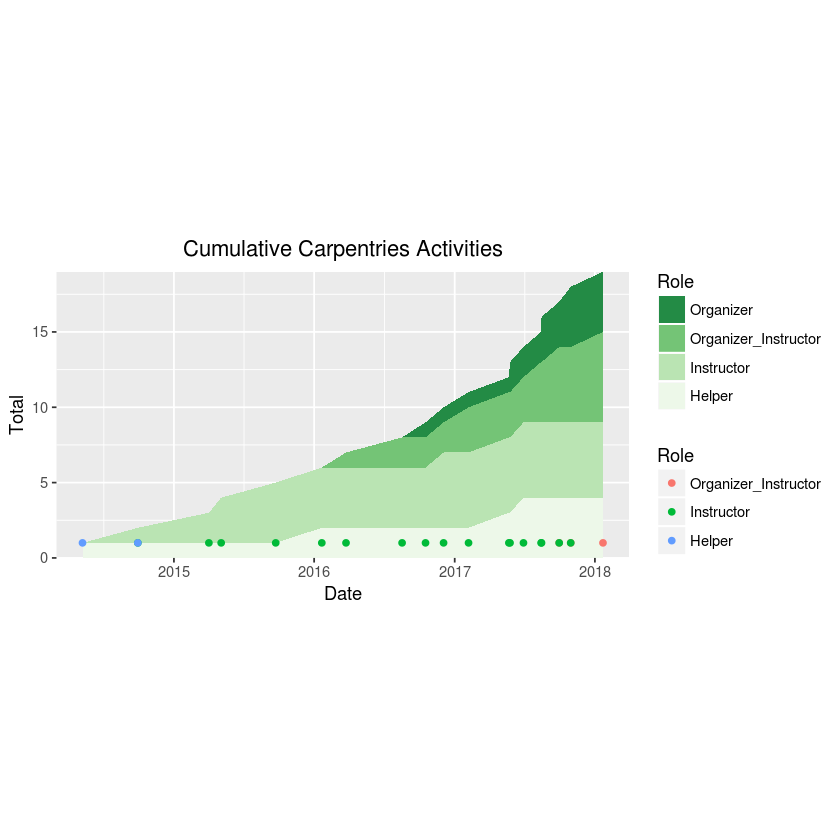

In [54]:
p <- ggplot(activity_long[order(activity_long$Role),], 
            aes(x = Date, y = Total, fill=Role)) + 
  geom_area(position='stack') +
  geom_point(data=events_long, aes(x=Date, color=Role), inherit.aes=FALSE, stat="count") + 
  scale_y_continuous(expand = c(0, 0)) +
  scale_fill_brewer(palette="Greens", direction=-1) + 
  ggtitle("Cumulative Carpentries Activities") + 
  theme(plot.title = element_text(hjust = 0.5), 
        aspect.ratio=4/8)
print(p)

The geom_area graph looks pretty but the straight connecting lines between discrite events are wrong and make it hard to read off values.

A stacked bar graph is more appropriate and if we make the bars wide enough to touch, maybe we can get a similar area effect. - Had problems with this idea.

Maybe adding the events as stars on the graph will help people understand the valid data points to read.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“position_stack requires non-overlapping x intervals”

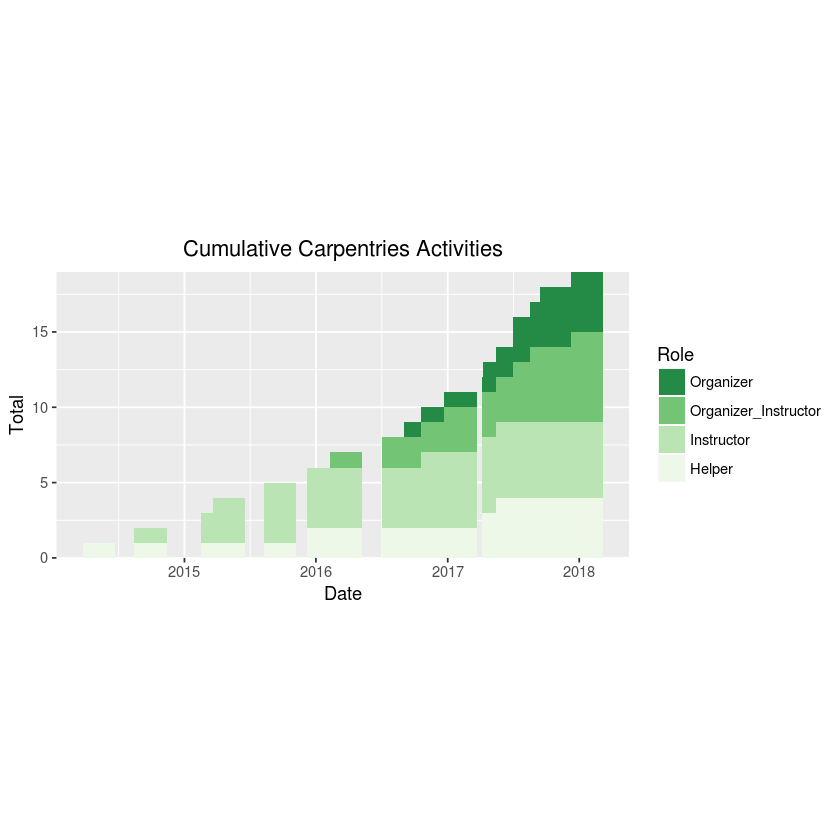

In [33]:
p <- ggplot(activity_long[order(activity_long$Role),],
           aes(x=Date, y=Total, fill=Role)) + 
  geom_histogram(stat="identity", width=90) +
  scale_y_continuous(expand = c(0, 0)) +
  scale_fill_brewer(palette="Greens", direction=-1) + 
  ggtitle("Cumulative Carpentries Activities") + 
  theme(plot.title = element_text(hjust = 0.5), 
        aspect.ratio=4/8)
print(p)

In [10]:
ggsave("../carpentries_graph.png", width = 8, height = 4, units = "in", dpi = 75)